### 1.a. Model representation:
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. 0 or 1). There are two main types:
Simple linear regression uses traditional slope intercept form where there is a dependant variable y and an independent variable x. The dependent variable is related to the independent variable as y= mx+b
Example: Suppose one wants to prdict weight of human being based on its height so height will be the independent variable and weight will be dependent variable.
Weight can be explained as terms of height as
Weight= Coeff*Height+Bias


### Dataset :

In [ ]:
import pandas as pd  
import numpy as np
# initialize list of lists of height and weight
data = [[48, 60],[52, 67],[70, 90],[61,79],[63,87],[65,81],[50,84],[51,63]]
# create a dataframe
df = pd.DataFrame(data, columns = ['Height_cm', 'Weight_Kg']) 
df 
df['Height_cm']

### Model Building :

In [38]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() #Build Linear Regression Model
X=pd.DataFrame(df['Height_cm'])#Segregate independent Variable
Y=pd.DataFrame(df['Weight_Kg'])# Segregate Dependent Variable
lr.fit(X,Y)


Coeff=lr.coef_[0]
Bias=lr.intercept_[0]
print(Coeff,Bias)

[ 1.07489451] 14.5685654008


In [14]:
def predict_weight(height, coeff, bias):
    return coeff*height + bias

### Make Predictions :

In [15]:
predict_weight(df['Height_cm'],Coeff,Bias)#Predict Weight based on Linear regression Model

0    66.163502
1    70.463080
2    89.811181
3    80.137131
4    82.286920
5    84.436709
6    68.313291
7    69.388186
Name: Height_cm, dtype: float64

### 1.b. Cost Function :

In linear regression model, our primary goal is to minimize the error in prediction values.We need to optimize our coeeficients of independent variable so that the error is reduced. This can be done by minimizing the error function through different iterations. For linear regression we normally use MSE- Mean squared error as the cost function.
Given simple linear equation y=mx+b
We can calculate MSE as

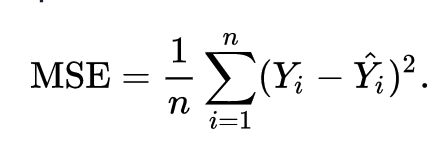

### Where ŷi=mxi+b

### Cost Function Code :

In [27]:
def cost_function(height, weight, coeff, bias):
    observations = len(height)
    total_error = 0.0
    for i1 in range(observations):
        total_error += (weight[i1] - (coeff*height[i1] + bias))**2# Calculate error based on MSE formula
    return total_error / observations
cost_function(df['Height_cm'],df['Weight_Kg'],Coeff,Bias)

array([ 46.52703059])

### 1.c. Gradient Decent :


To minimize MSE we use Gradient Descent to calculate the gradient of our cost function. 
Math
There are two parameters (coefficients) in our cost function we can control: Coefficient (m) of the independentg variable and 
and bias (b).Since we need to consider the impact each one has on the final prediction, we use partial derivatives. To find the partial derivatives, we use the Chain rule. We need the chain rule because (y−(mx+b))2
is really 2 nested functions: the inner function y−(mx+b) and the outer function x2

Partial derivatives can be calculated as 
df/dm=1/N ∑ -2xi(yi-(mxi+b))
df/db=1/N ∑ -2(yi-(mxi+b)
Given the learning rate of l we find the change in coefficient m as df/dm*l
Given the learning rate of l we find the change in bias b as df/db*l

We subtract these values from original values because the derivatives point in direction of steepest ascent




### 1.d. Gradient Decent for Linear Regression :


To solve for the gradient, we iterate through our data points using our new coefficient and bias values and take the average of the partial derivatives. The resulting gradient tells us the slope of our cost function at our current position (i.e. coefficient and bias) and the direction we should update to reduce our cost function (we move in the direction opposite the gradient). The size of our update is controlled by the learning rate.




 ### Gradient Decent Code for Linear Regression :

In [39]:
def update_coeff(height, weight, coeff, bias, learning_rate):
    coeff_deriv = 0
    bias_deriv = 0
    observations = len(height)

    for i in range(observations):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        coeff_deriv += -2*height[i] * (weight[i] - (coeff*height[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(weight[i] - (coeff*height[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    coeff -= (coeff_deriv / observations) * learning_rate
    bias -= (bias_deriv / observations) * learning_rate

    return coeff, bias
def train(height, weight, coeff, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        coeff,bias = update_coeff(height, weight, coeff, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(height, weight, coeff, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print(i, coeff, bias, cost)

    return coeff, bias, cost_history
train(df['Height_cm'],df['Weight_Kg'],0,0,0.000005,150)

0 0.0445525 0.00076375 5557.70746557
10 0.415381415204 0.00712505109337 2826.81011361
20 0.678681663861 0.0116492014478 1450.04087508
30 0.865633124393 0.0148689160789 755.94904347
40 0.998374506486 0.0171624396647 406.025859783
50 1.09262500121 0.0187983380092 229.613703434
60 1.15954573635 0.0199673014122 140.676326642
70 1.20706146918 0.0208047260781 95.8389541891
80 1.2407990305 0.0214067476369 73.2343943553
90 1.26475364991 0.0218416254569 61.8384038707
100 1.28176206806 0.0221578258701 56.0931616298
110 1.29383846144 0.0223897615204 53.1967179035
120 1.30241295967 0.0225618664843 51.7364827334
130 1.3085010005 0.0226914897365 51.0003054448
140 1.31282357713 0.0227909496033 50.6291585785


(1.3156308186160144,
 0.022861958830127246,
 [5557.7074655724891,
  5193.1341380779122,
  4852.6942259269154,
  4534.7901856506869,
  4237.930225291283,
  3960.7213040399465,
  3701.8625952736975,
  3460.1393823148765,
  3234.4173582689859,
  3023.637303192349,
  2826.8101136117043,
  2643.0121610713654,
  2471.3809579274994,
  2311.1111100509197,
  2161.4505374460832,
  2021.6969450512313,
  1891.1945271586044,
  1769.3308899899316,
  1655.5341779861244,
  1549.270390326039,
  1450.040875081839,
  1357.379989252076,
  1270.8529136919803,
  1190.053612687348,
  1114.6029285971404,
  1044.1468026237469,
  978.35461336172125,
  916.91762532849384,
  859.54754019664722,
  805.97514392930043,
  755.94904347015904,
  709.23448706004604,
  665.61226264414586,
  624.87766920064144,
  586.83955616362368,
  551.31942643266814,
  518.15059875989118,
  487.17742558390324,
  458.25456264028219,
  431.24628692115198,
  406.02585978333263,
  382.47493221639115,
  360.48298947976281,
  339.9468325028

As we can see, as the iterations increase the cost function value decreases . When i=140, it reduces to 50.62. So, this is how gradient descent helps us reducing the error iteration wise. 